<a href="https://colab.research.google.com/github/alanmejiaa/Datos-Masivos/blob/main/Proyecto%20Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto Final | Predicción de diabetes en personas

Sabemos que la diabetes es una de las principales enfermedades en Mexico por lo que este proyecto esta enfocado en crear un modelo predictivo confiable y preciso que pueda indicarnos cuando es mas probable que una persona sufre de diabetes, también ver cuales son las principales variables que afectan al momento de saber si tienes o no diabetes. Sabes cuales son las variables que pueden afectar mas al si una persona es o no diabética podría ser esencial para saber en que enfocarnos a la hora de la prevención de diabetes.

## Análisis Exploratorio de los Datos

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
from tabulate import tabulate

In [ ]:
tabla1_lx = tabulate(tabla1, headers='keys', tablefmt='latex')

print(tabla1_lx)

\begin{tabular}{rrrrrrrrrr}
\hline
    &   Pregnancies &   Glucose &   BloodPressure &   SkinThickness &   Insulin &   BMI &   DiabetesPedigreeFunction &   Age &   Outcome \\
\hline
  0 &             6 &       148 &              72 &              35 &         0 &  33.6 &                       0.63 &    50 &         1 \\
  1 &             1 &        85 &              66 &              29 &         0 &  26.6 &                       0.35 &    31 &         0 \\
  2 &             8 &       183 &              64 &               0 &         0 &  23.3 &                       0.67 &    32 &         1 \\
  3 &             1 &        89 &              66 &              23 &        94 &  28.1 &                       0.17 &    21 &         0 \\
  4 &             0 &       137 &              40 &              35 &       168 &  43.1 &                       2.29 &    33 &         1 \\
  5 &             5 &       116 &              74 &               0 &         0 &  25.6 &                       0.2  &

In [9]:
df = pd.read_csv("diabetes.csv")
tabla1 = df.head(10)
print(tabla1)

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   
5            5      116             74              0        0  25.6   
6            3       78             50             32       88  31.0   
7           10      115              0              0        0  35.3   
8            2      197             70             45      543  30.5   
9            8      125             96              0        0   0.0   

   DiabetesPedigreeFunction  Age  Outcome  
0                      0.63   50        1  
1                      0.35   31        0  
2                      0.67   32        1  
3                      0.17   2

In [15]:
import pandas as pd
import scipy.stats as stats

# Cargar el DataFrame
df = pd.read_csv("diabetes.csv")
tabla1 = df.head(10)

# Seleccionar la columna "outcome"
column_name = "Outcome"
data = tabla1[column_name]

# Aplicar la prueba de normalidad (Shapiro-Wilk)
statistic, p_value = stats.shapiro(data)

# Interpretar los resultados de la prueba
alpha = 0.05

print(f"Estadística de prueba: {statistic}")
print(f"Valor p: {p_value}")

if p_value > alpha:
    print(f'No se puede rechazar la hipótesis nula. Los datos en "{column_name}" parecen provenir de una distribución normal.')
else:
    print(f'Se rechaza la hipótesis nula. Los datos en "{column_name}" no parecen provenir de una distribución normal.')

Estadística de prueba: 0.6404852867126465
Valor p: 0.00016867939848452806
Se rechaza la hipótesis nula. Los datos en "Outcome" no parecen provenir de una distribución normal.


In [16]:
import pandas as pd
import scipy.stats as stats

# Cargar el DataFrame
df = pd.read_csv("diabetes.csv")
tabla1 = df.head(10)

# Seleccionar la columna "Glucose"
column_name = "Glucose"
data = tabla1[column_name]

# Aplicar la prueba de normalidad (Shapiro-Wilk)
statistic, p_value = stats.shapiro(data)

# Interpretar los resultados de la prueba
alpha = 0.05

print(f"Estadística de prueba: {statistic}")
print(f"Valor p: {p_value}")

if p_value > alpha:
    print(f'No se puede rechazar la hipótesis nula. Los datos en "{column_name}" parecen provenir de una distribución normal.')
else:
    print(f'Se rechaza la hipótesis nula. Los datos en "{column_name}" no parecen provenir de una distribución normal.')

Estadística de prueba: 0.9344799518585205
Valor p: 0.4933721721172333
No se puede rechazar la hipótesis nula. Los datos en "Glucose" parecen provenir de una distribución normal.


Se realizo una prueba de normalidad para las variables de Outcome y Glucouse, esto se realizo como feedback dado por la profesora el dia de la exposicion

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [18]:
df.shape

(768, 9)

In [19]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.63,50,1
1,1,85,66,29,0,26.6,0.35,31,0
2,8,183,64,0,0,23.3,0.67,32,1
3,1,89,66,23,94,28.1,0.17,21,0
4,0,137,40,35,168,43.1,2.29,33,1


In [20]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.472396,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331242,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.080000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.240000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.370000,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.630000,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


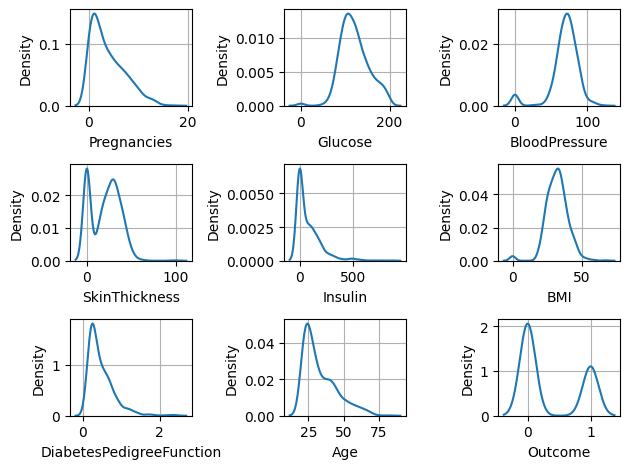

In [21]:
r=3
c=3
it=1
for i in df:
    plt.subplot(r,c,it)
    sns.kdeplot(x = df.loc[:,i], data = df)
    plt.grid()
    it+=1
plt.tight_layout()
plt.show()


El gráfico de densidad nos permitirá visualizar cómo se distribuyen las edades en cada categoría de "Outcome" y si hay alguna diferencia en la distribución de edades entre las personas con resultado positivo (1) y resultado negativo (0) para la diabetes. Si las densidades tienen formas diferentes o se superponen de manera distinta, podría indicar una relación entre la edad y la variable objetivo.
Observamos que la edad esta concentrada en los 25 años.
El numero de embarazos esta concentrado al inicio de la gráfico, esto en relación que si se concentro en personas de 25 años, es altamente probable que no hayan estado embarazadas, o solo una vez.


In [22]:
matriz_correlacion = df.corr()

In [23]:
matriz_correlacion

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033542,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.136990,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041965,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.184587,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185387,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.141157,0.036242,0.292695
DiabetesPedigreeFunction,-0.033542,0.136990,0.041965,0.184587,0.185387,0.141157,1.000000,0.033823,0.173781
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033823,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173781,0.238356,1.000000


In [24]:
from tabulate import tabulate

In [25]:
tabla_latex = tabulate(matriz_correlacion, headers='keys', tablefmt='latex')

print(tabla_latex)

\begin{tabular}{lrrrrrrrrr}
\hline
                          &   Pregnancies &   Glucose &   BloodPressure &   SkinThickness &    Insulin &       BMI &   DiabetesPedigreeFunction &        Age &   Outcome \\
\hline
 Pregnancies              &     1         & 0.129459  &       0.141282  &      -0.0816718 & -0.0735346 & 0.0176831 &                 -0.0335422 &  0.544341  & 0.221898  \\
 Glucose                  &     0.129459  & 1         &       0.15259   &       0.0573279 &  0.331357  & 0.221071  &                  0.13699   &  0.263514  & 0.466581  \\
 BloodPressure            &     0.141282  & 0.15259   &       1         &       0.207371  &  0.0889334 & 0.281805  &                  0.0419649 &  0.239528  & 0.0650684 \\
 SkinThickness            &    -0.0816718 & 0.0573279 &       0.207371  &       1         &  0.436783  & 0.392573  &                  0.184587  & -0.11397   & 0.0747522 \\
 Insulin                  &    -0.0735346 & 0.331357  &       0.0889334 &       0.436783  &  1    

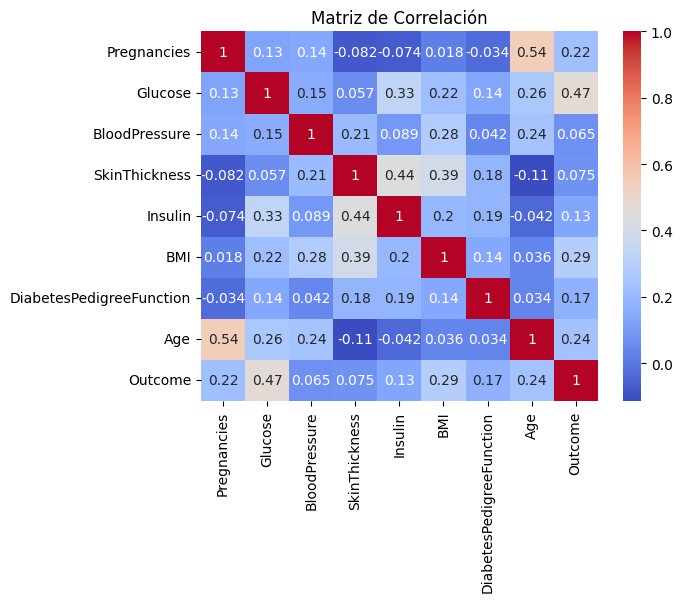

In [26]:
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

Correlaciones positivas significativas:
•	"Glucose" tiene una correlación positiva significativa con "Outcome" (0.466), "BMI" (0.221), "Age" (0.264) y "Insulin" (0.331).
•	"BMI" tiene una correlación positiva significativa con "Outcome" (0.293), "Glucose" (0.221) y "SkinThickness" (0.393).
•	"Insulin" tiene una correlación positiva significativa con "SkinThickness" (0.437) y "Glucose" (0.331).
•	"Age" tiene una correlación positiva significativa con "Pregnancies" (0.544) y "Outcome" (0.238).
•	"Outcome" tiene una correlación positiva significativa con "Glucose" (0.467), "BMI" (0.293), "Age" (0.238) y "Insulin" (0.131).
•	"SkinThickness" tiene una correlación positiva significativa con "Insulin" (0.437) y "BMI" (0.393).

Correlaciones negativas significativas:
•	"Pregnancies" tiene una correlación negativa significativa con "SkinThickness" (-0.082).
•	"SkinThickness" tiene una correlación negativa significativa con "Pregnancies" (-0.082).
•	"DiabetesPedigreeFunction" tiene correlaciones débiles y cercanas a cero con todas las demás variables.
Correlaciones cercanas a cero:
•	"DiabetesPedigreeFunction" tiene correlaciones cercanas a cero con todas las variables.
•	"BloodPressure" tiene correlaciones relativamente bajas con las demás variables


In [27]:
x = df.drop(columns=['Outcome'])
y = df['Outcome']

In [28]:
#Entrenamiento y prueba
x.entreno, x.prueba, y.entreno, y.prueba = train_test_split(x, y, test_size=0.2, shuffle=True)

<ipython-input-28-93c05c7d481d>:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  x.entreno, x.prueba, y.entreno, y.prueba = train_test_split(x, y, test_size=0.2, shuffle=True)


In [29]:
#Se están eliminando las filas con valores faltantes
x.entreno.dropna(inplace=True)
y.entreno = y.entreno[x.entreno.index]

In [30]:
import xgboost as xgb
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
import xgboost as xgb
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

/usr/local/lib/python3.10/dist-packages/sklearn/experimental/enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


In [31]:
# Creación y entrenamiento de los modelos
models = {
    'Gradient Boosting': GradientBoostingRegressor(),
    'HistGradientBoosting': HistGradientBoostingRegressor(),
    'XGBoost': xgb.XGBRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Linear Regression': LinearRegression(),
    'Support Vector Regression': SVR(),
    'Neural Network': MLPRegressor()
}

results = {}
for name, model in models.items():
    model.fit(x.entreno, y.entreno)
    y.predi = model.predict(x.prueba)
    mse = mean_squared_error(y.prueba, y.predi)
    r2 = r2_score(y.prueba, y.predi)
    results[name] = {'MSE': mse, 'R2 Score': r2}

#Imprimir resultados
print("Resultados:")
for name, result in results.items():
    print(f"{name}:")
    print(f"  MSE: {result['MSE']}")
    print(f"  R2 Score: {result['R2 Score']}")
    print()

# Mejor modelo
best_model = min(results, key=lambda x: results[x]['MSE'])
print(f"Mejor modelo: {best_model}")

Resultados:
Gradient Boosting:
  MSE: 0.18584321175181565
  R2 Score: 0.18380414631369257

HistGradientBoosting:
  MSE: 0.21023336388236677
  R2 Score: 0.07668621151218324

XGBoost:
  MSE: 0.2198857973278737
  R2 Score: 0.034294153809656946

Random Forest:
  MSE: 0.18009870129870129
  R2 Score: 0.2090331851851852

Linear Regression:
  MSE: 0.1677813509769736
  R2 Score: 0.263129163005573

Support Vector Regression:
  MSE: 0.19404735939365333
  R2 Score: 0.1477727453000217

Neural Network:
  MSE: 0.32339313067043135
  R2 Score: -0.4202947198111018

Mejor modelo: Linear Regression


In [32]:
predictions = pd.DataFrame({'Real': y.prueba})

# Hacer las predicciones para cada modelo y agregarlas a la tabla
for name, model in models.items():
    model.fit(x.entreno, y.entreno)
    y.predi = model.predict(x.prueba)
    predictions[name] = y.predi

print(predictions)

     Real  Gradient Boosting  HistGradientBoosting   XGBoost  Random Forest  \
444     1           0.229786              0.024378  0.236849           0.11   
313     0           0.213591              0.220874  0.044354           0.26   
755     1           0.512146              0.654066  0.735084           0.83   
27      0          -0.018789             -0.045969 -0.070359           0.00   
254     1           0.516358              0.295140  0.298871           0.46   
..    ...                ...                   ...       ...            ...   
387     1           0.228715              0.290522 -0.040771           0.25   
389     0           0.296472              0.341205  0.272502           0.36   
89      0          -0.025233             -0.068660  0.184323           0.04   
464     0           0.257156              0.425972  0.346730           0.43   
472     0           0.198072              0.129310  0.303908           0.14   

     Linear Regression  Support Vector Regression  

In [33]:
Real=pd.DataFrame(y.prueba)
Real.columns = ["Real"]
Real.head()

,Real
444,1
313,0
755,1
27,0
254,1


In [34]:
predictions=pd.DataFrame(predictions)
svr = predictions['Support Vector Regression']
lr = predictions ['Linear Regression']
rf = predictions['Random Forest']

predictions_mejores = pd.DataFrame({'Predicción RF': rf, 'Prediccion LR' : lr, 'Predicción SVR': svr})
predictions_mejores.head()

,Predicción RF,Prediccion LR,Predicción SVR
444,0.11,0.297366,0.141020
313,0.26,0.287399,0.077182
755,0.83,0.454825,0.342404
27,0.00,-0.003536,-0.130767
254,0.46,0.363927,-0.061798


In [35]:
RealPredictions=pd.concat([predictions_mejores,Real],axis=1)
RealPredictions=pd.DataFrame(RealPredictions)
RealPredictions.head(5)

,Predicción RF,Prediccion LR,Predicción SVR,Real
444,0.11,0.297366,0.141020,1
313,0.26,0.287399,0.077182,0
755,0.83,0.454825,0.342404,1
27,0.00,-0.003536,-0.130767,0
254,0.46,0.363927,-0.061798,1


Como se platico en la reunion, observamos que ninguno de los modelos se ajusta correctamente debido a que todas las variables estan afectando en la prediccion del modelo, la variable Outcome es binomial por lo que puede no ser muy preciso, nos hubiera gustado tener mas datos y tener la variable de respuesta de alguna otra manera y ver las nuevas predicciones.